### CCBST Classification Assignment - Johnfredrick E. Owotorufa

##### End-to-End Project Using Logistic Regression and Decision Tree Classifiers

**Problem Statement** 
*This project aims to predict the type of wine based on various chemical properties using Logistic Regression and Decision Tree classifiers, and to evaluate and compare the performance of these models using the following evaluation metrics: accuracy, precision, recall, F1-score, and confusion matrix..*

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [3]:
# Loading the wine dataset
data = load_wine()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

In [4]:
# Creating the DataFrame / Displaying Feature names and Target classes
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("Feature Names:", feature_names)
print("Target Classes:", target_names)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']


In [5]:
# Statistics
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

### Data Preprocessing

In [6]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Checking for missing values
print("Missing values in training set:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in test set:", pd.DataFrame(X_test).isnull().sum().sum())

Missing values in training set: 0
Missing values in test set: 0


### Building the Models

In [9]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [10]:
# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

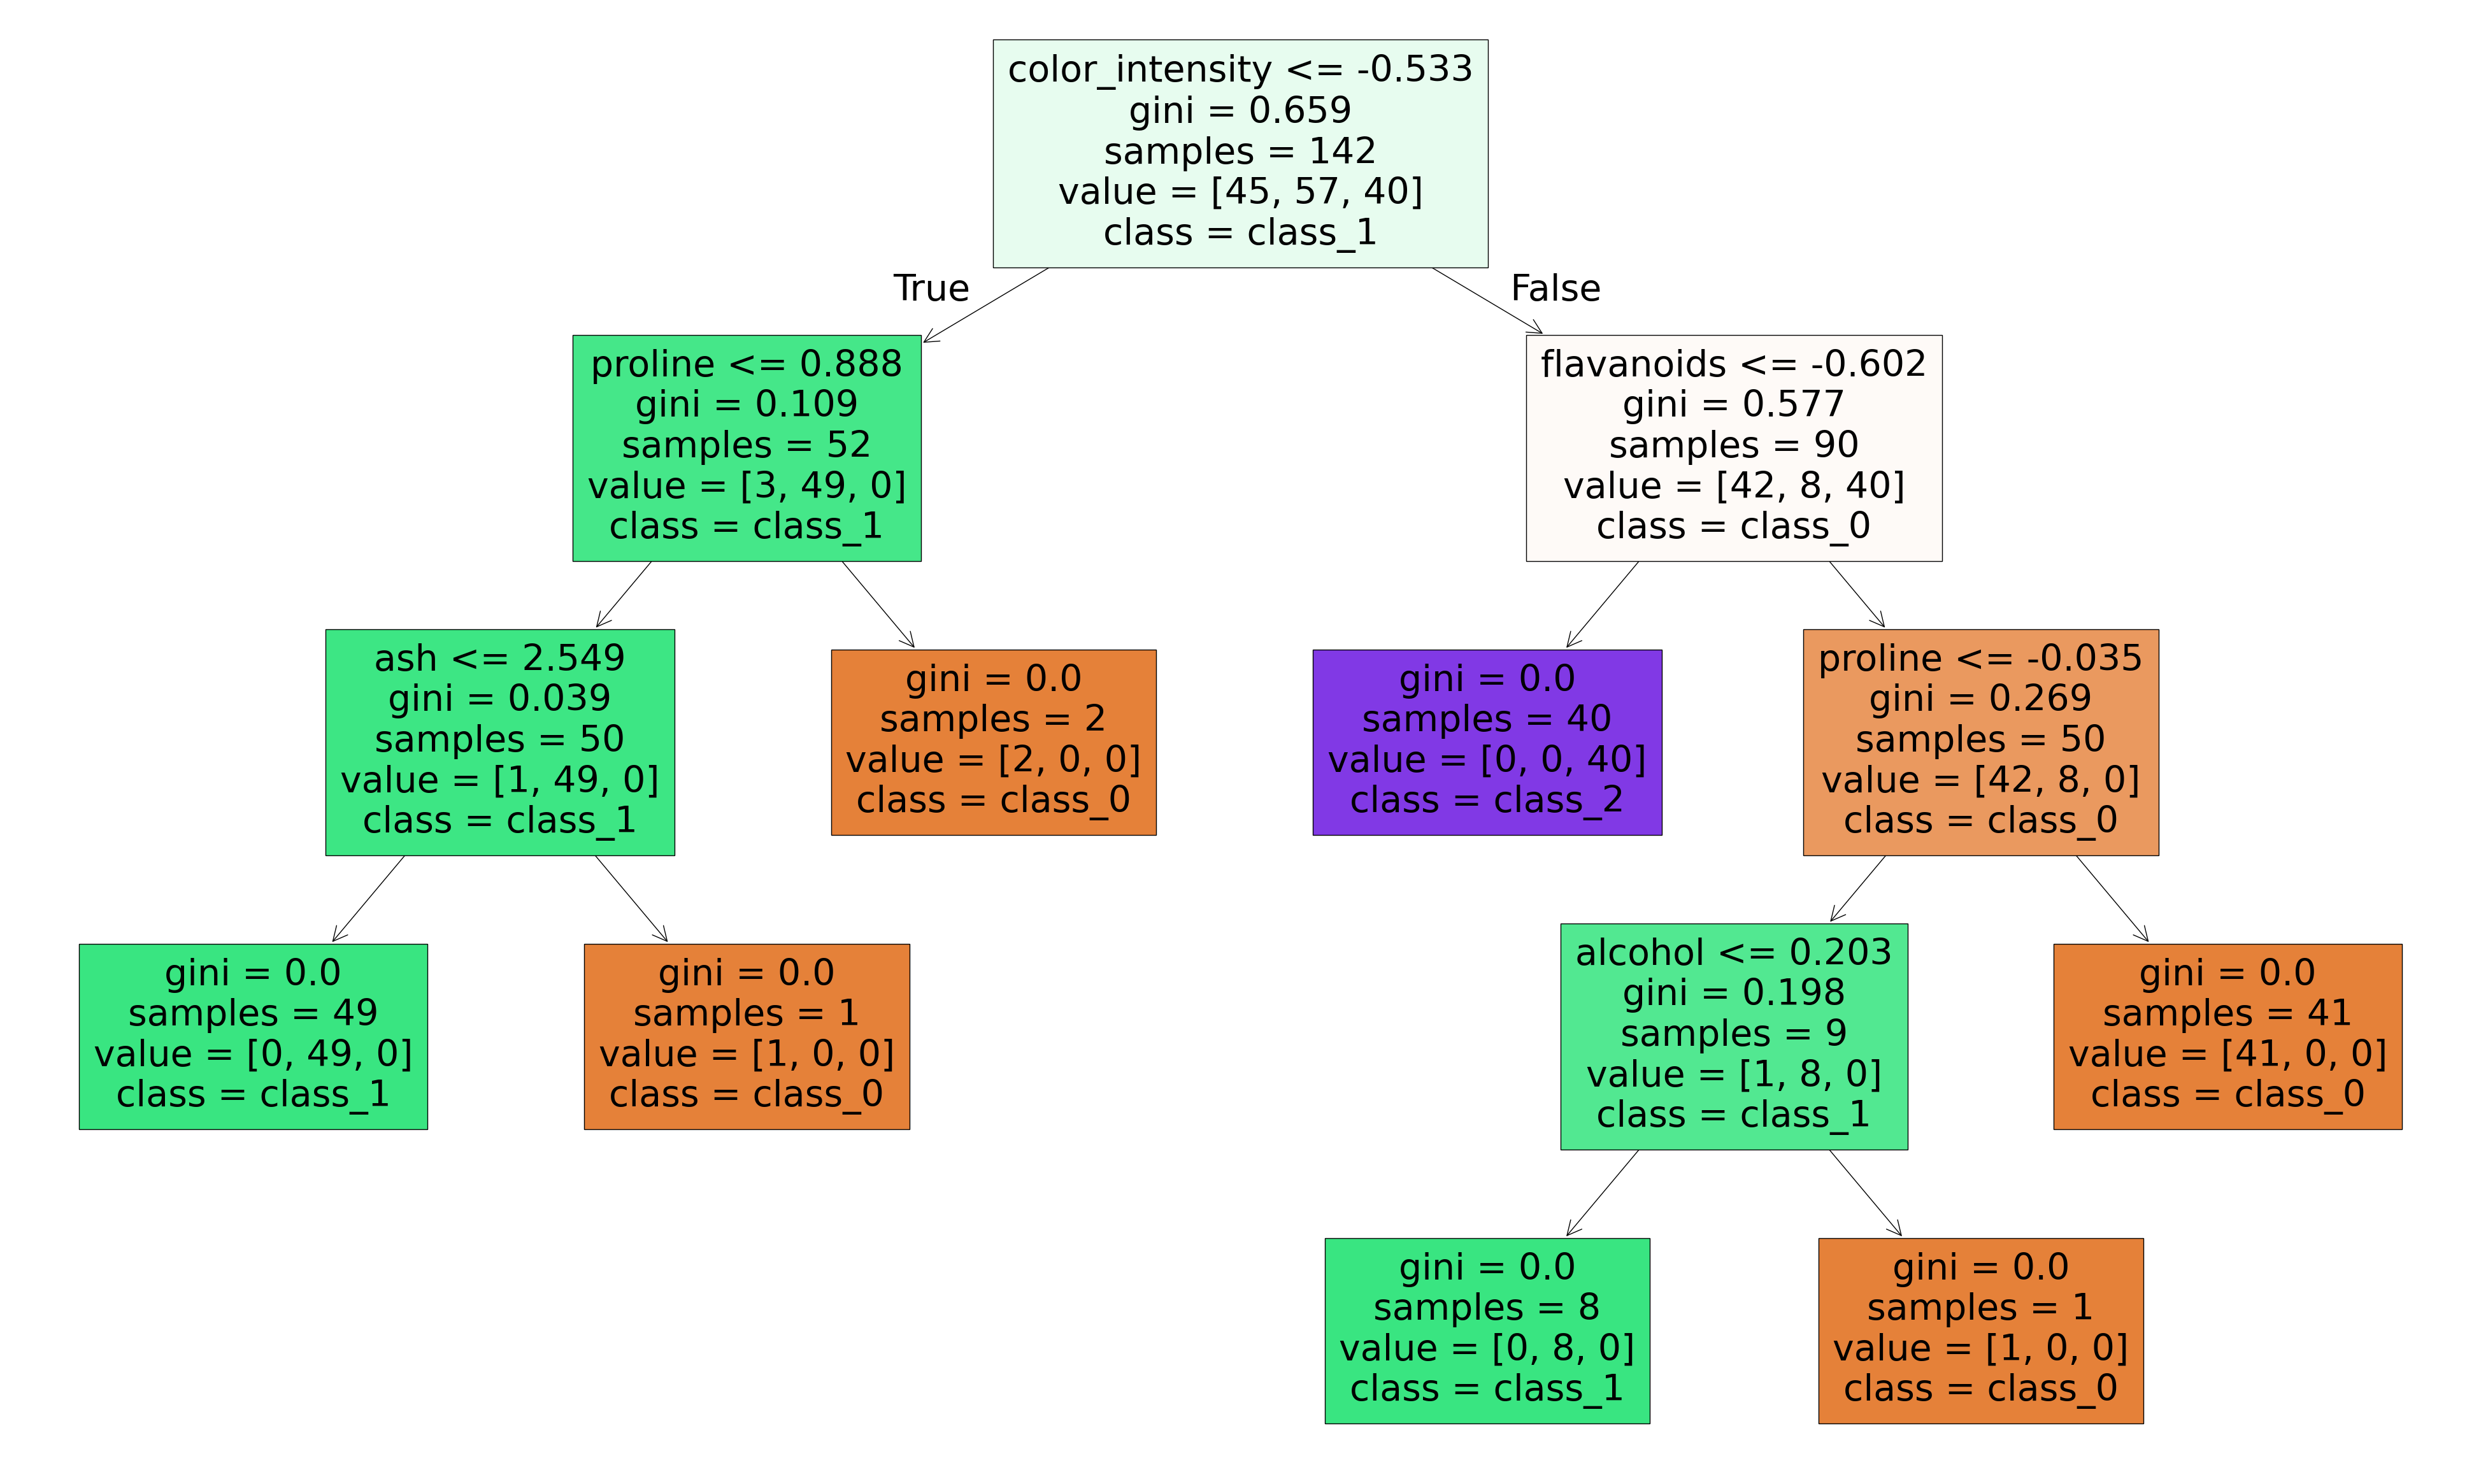

In [11]:
# Visualizing the Decision Tree
fig = plt.figure(figsize=(50, 30))
_ = tree.plot_tree(tree_clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)

##### Evaluating the Models 

In [12]:
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

In [13]:
# Printing the results
print("Logistic Regression:")
print(f"  Accuracy: {log_reg_accuracy}")
print(f"  Precision: {log_reg_precision}")
print(f"  Recall: {log_reg_recall}")
print(f"  F1-Score: {log_reg_f1}")

Logistic Regression:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0


In [14]:
# Performing 5-fold cross-validation to check for over-fitting
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.88888889 0.94444444 0.94444444 1.         1.        ]
Mean Cross-Validation Score: 0.9555555555555555


In [15]:
# Decision Tree Evaluation
y_pred_tree = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree, average='weighted')
tree_recall = recall_score(y_test, y_pred_tree, average='weighted')
tree_f1 = f1_score(y_test, y_pred_tree, average='weighted')

In [16]:
# Printing the results
print("Decision Tree:")
print(f" Accuracy: {tree_accuracy}")
print(f" Precision: {tree_precision}")
print(f" Recall: {tree_recall}")
print(f" F1-Score: {tree_f1}")

Decision Tree:
 Accuracy: 0.9444444444444444
 Precision: 0.9462962962962962
 Recall: 0.9444444444444444
 F1-Score: 0.9439974457215836


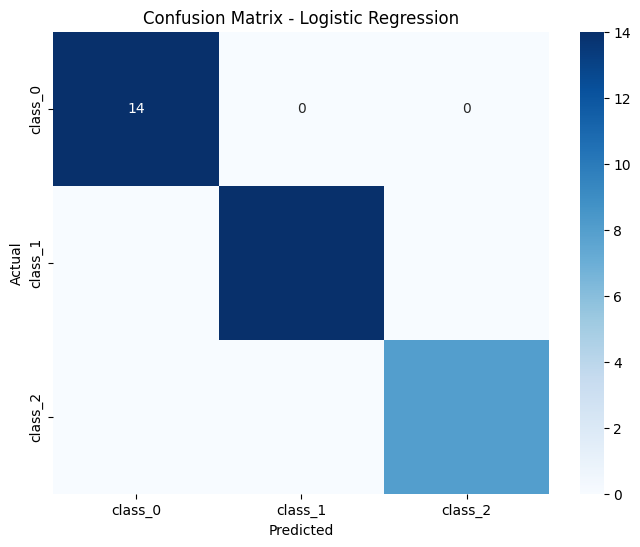

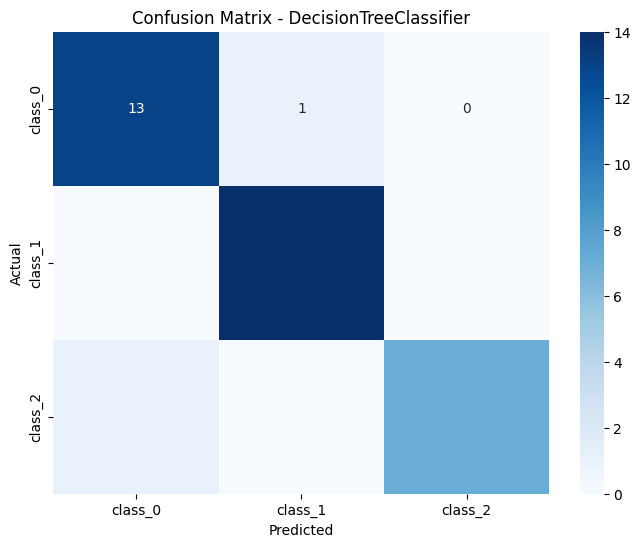

In [17]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_tree, "DecisionTreeClassifier")

### Model Comparison

**1. Accuracy:** 
*Logistic Regression* achieved an accuracy of 1.0, meaning it correctly classified all the test samples. Suspecting over-fitting, I ran a cross validation analysis and the scores showed that the model was well robust and not over-fitted.
*Decision Tree* achieved an accuracy of approximately 0.944, indicating it correctly classified about 94.4% of the test samples.

**2. Precision:**
*Logistic Regression's* precision is 1.0, indicating that all the positive predictions made by the model were correct.
*Decision Tree's* precision is approximately 0.946, meaning that about 94.6% of the positive predictions made by the model were correct.

**3.Recall:**
*Logistic Regression's* recall is 1.0, indicating that the model correctly identified all the actual positive cases.
*Decision Tree's* recall is approximately 0.944, meaning that the model correctly identified about 94.4% of the actual positive cases.

**4.F1-Score:**
*Logistic Regression's* F1-Score is 1.0, which is the harmonic mean of precision and recall, indicating perfect balance between the two.
*Decision Tree's* F1-Score is approximately 0.944, indicating a good balance between precision and recall, but slightly lower than Logistic Regression.

**5. Confusion Matrix**
*Logistic Regression* had no false positives or negatives while *Decicion Tree* had some false positives and negatives, but majority of the predictions would still be correct.

In [ ]:
# Streamlit app
!streamlit run Wine_Class_App.py

### Conclusion

This end-to-end project demonstrated the entire process of building, training, and evaluating machine learning models, specifically Linear Regression and Decision Tree Classifier, and deploying it on a web application using Streamlit.

By comparing the Logistic Regression and Decision Tree classifiers, we can see that the Logistic Regression outperforms the Decision Tree classifier on this dataset, achieving perfect scores across all evaluation metrics. 

Based on the cross-validation results, we can further conclude that the Logistic Regression model is not overfitting. The model demonstrates strong and consistent performance across different subsets of the data, indicating good generalization. The high mean cross-validation score further supports the model's robustness. 

The Decision Tree classifier also performs well but has slightly lower scores compared to Logistic Regression. This suggests that Logistic Regression is better suited for this specific classification task.

This project also emphasized the importance of data preprocessing, proper documentation and collaborative work using GitHub.